In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline
sns.set_style('whitegrid')

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df_train = pd.read_csv(r'C:\Users\casocha\Desktop\Kaggle\pubg/train_V2.csv')
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df_test = pd.read_csv(r'C:\Users\casocha\Desktop\Kaggle\pubg/test_V2.csv')
df_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [4]:
df_train = df_train.drop('rankPoints',axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 28 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(18), object(4)
memory usage: 950.0+ MB


In [5]:
# Check number of nulls in each feature column
nulls_per_column = df_train.isnull().sum()
print(nulls_per_column)

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


In [13]:
X_train1 = df_train[['Id','groupId','matchId', 'boosts','damageDealt','heals','killPlace','kills','killStreaks','longestKill',
                    'walkDistance','weaponsAcquired','swimDistance','rideDistance','headshotKills','matchType','winPlacePerc']]
X_test1 = df_test[['Id','groupId','matchId', 'boosts','damageDealt','heals','killPlace','kills','killStreaks','longestKill',
                    'walkDistance','weaponsAcquired','swimDistance','rideDistance','headshotKills','matchType']]

Text(0.5,1,'Heatmap of Attribute Correlation with Winning')

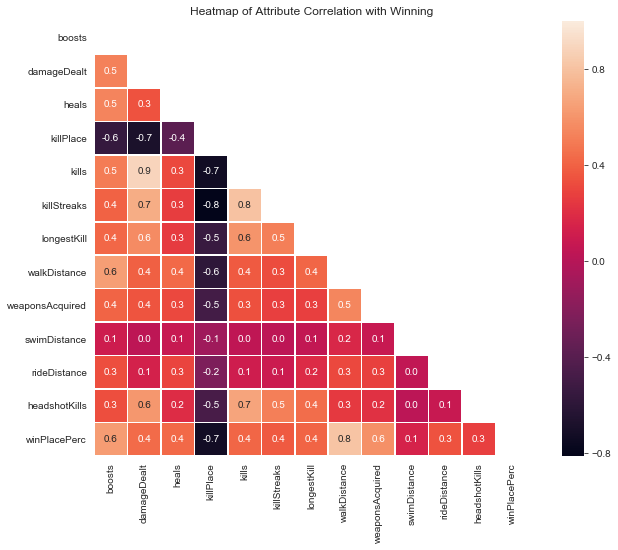

In [14]:
fig, axarr = plt.subplots(1, 1, figsize=(12, 8))
#Subsetting the data
cor = X_train1.corr() #Calculate the correlation of the above variables
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, mask = mask,square = True,annot=True, linewidths=.5, fmt= '.1f') #Plot the correlation as heat map
plt.title('Heatmap of Attribute Correlation with Winning')

Walk distance, weapons acquired, boosts, & damage dealt seem to have the highest correlations with win. Which makes sense since they are game mechanic actions so the longer you're alive / still in the game the more you use. DBNOS, headshots, assists, heals, kills, kill streaks, & longestKill also seem to be important. The additional movement variables like ride & swim are low but total movement could be important

In [15]:
X_train1['total_distance'] = X_train1['walkDistance'] + X_train1['swimDistance'] + X_train1['rideDistance']
X_test1['total_distance'] = X_test1['walkDistance'] + X_test1['swimDistance'] + X_test1['rideDistance']

X_train1['total_item'] = X_train1['boosts'] + X_train1['heals'] 
X_test1['total_item'] = X_test1['boosts'] + X_test1['heals'] 

X_train1['headshot_percentage'] = (X_train1['headshotKills'] / X_train1['kills']) * 100
X_test1['headshot_percentage'] = (X_test1['headshotKills'] / X_test1['kills']) * 100

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [16]:
# One hot encode matchType
X_train1 = pd.get_dummies(X_train1, columns=['matchType'])
X_test1 = pd.get_dummies(X_test1, columns=['matchType'])

# Take a look at the encoding
matchType_encoding = X_train1.filter(regex='matchType')
matchType_encoding.head()

,matchType_crashfpp,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
X_train1.head()

,Id,groupId,matchId,boosts,damageDealt,heals,killPlace,kills,killStreaks,longestKill,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.00,0,60,0,0,0.00,...,0,0,0,0,0,0,0,0,0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,91.47,0,57,0,0,0.00,...,0,0,0,0,0,0,0,0,0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,0,68.00,0,47,0,0,0.00,...,0,0,0,0,0,0,0,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,32.90,0,75,0,0,0.00,...,0,0,0,0,0,0,0,0,0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,100.00,0,45,1,1,58.53,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Turn groupId and match Id into categorical types
X_train1['groupId'] = X_train1['groupId'].astype('category')
X_train1['matchId'] = X_train1['matchId'].astype('category')

# Get category coding for groupId and matchID
X_train1['groupId_cat'] = X_train1['groupId'].cat.codes
X_train1['matchId_cat'] = X_train1['matchId'].cat.codes

# Get rid of old columns
X_train1.drop(columns=['groupId', 'matchId'], inplace=True)

# Turn groupId and match Id into categorical types
X_test1['groupId'] = X_test1['groupId'].astype('category')
X_test1['matchId'] = X_test1['matchId'].astype('category')

# Get category coding for groupId and matchID
X_test1['groupId_cat'] = X_test1['groupId'].cat.codes
X_test1['matchId_cat'] = X_test1['matchId'].cat.codes

# Get rid of old columns
X_test1.drop(columns=['groupId', 'matchId'], inplace=True)

# Lets take a look at our newly created features
X_train1[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,613775,30086
1,827823,32752
2,843521,3143
3,1340462,45261
4,1757849,20532


In [19]:
X_train1 = X_train1.fillna(-1)
X_train1.head()

,Id,boosts,damageDealt,heals,killPlace,kills,killStreaks,longestKill,walkDistance,weaponsAcquired,...,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,groupId_cat,matchId_cat
0,7f96b2f878858a,0,0.00,0,60,0,0,0.00,244.80,1,...,0,0,0,0,0,0,0,1,613775,30086
1,eef90569b9d03c,0,91.47,0,57,0,0,0.00,1434.00,5,...,0,0,0,0,0,0,0,1,827823,32752
2,1eaf90ac73de72,0,68.00,0,47,0,0,0.00,161.80,2,...,0,0,0,0,0,0,0,0,843521,3143
3,4616d365dd2853,0,32.90,0,75,0,0,0.00,202.70,3,...,0,0,0,0,0,0,0,1,1340462,45261
4,315c96c26c9aac,0,100.00,0,45,1,1,58.53,49.75,2,...,0,0,0,0,0,1,0,0,1757849,20532


In [21]:
from sklearn.model_selection import train_test_split
#X_train = np.array(X_train1.drop(['winPlacePerc','Id'], axis=1))
y_train = X_train1['winPlacePerc'].values

X_test = np.array(X_test1.drop(['Id'], axis=1))
ids = X_test1['Id'].values


X_train1 = X_train1.drop(['winPlacePerc','Id'],axis=1)#.apply(pd.to_numeric)
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 33 columns):
boosts                        int64
damageDealt                   float64
heals                         int64
killPlace                     int64
kills                         int64
killStreaks                   int64
longestKill                   float64
walkDistance                  float64
weaponsAcquired               int64
swimDistance                  float64
rideDistance                  float64
headshotKills                 int64
total_distance                float64
total_item                    int64
headshot_percentage           float64
matchType_crashfpp            uint8
matchType_crashtpp            uint8
matchType_duo                 uint8
matchType_duo-fpp             uint8
matchType_flarefpp            uint8
matchType_flaretpp            uint8
matchType_normal-duo          uint8
matchType_normal-duo-fpp      uint8
matchType_normal-solo         uint8
matchType

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

C:\Users\casocha\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\casocha\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.7, random_state=0)

In [24]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error

In [25]:
import xgboost as xgb

In [26]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid) 
d_test = xgb.DMatrix(X_test)

In [32]:
# Create the parameter dictionary: param
param = {'max_depth': 10, "n_estimators":10,'eval_metric':'mae', 'silent': 1, 'colsample_bytree':0.3}
#model = xgb.train(params, train_dmat, maximize=True, verbose_eval=5)

model = xgb.train(param,d_train)

In [34]:
preds = model.predict(d_valid)

In [35]:
print(mean_absolute_error(y_valid,preds))

0.09412530435005978
